In [77]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load Dataset
df = pd.read_csv("iris.csv")
data = df.iloc[:, 1:]



In [79]:

# Encode the categorical columns
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])

# Defining the X and y
X = data.drop(columns=['Species'], axis=1)
y = data['Species']

# Splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [92]:

def evaluate_model(model, X_train, X_test, y_train, y_test):
    '''Evaluates a model's performance and returns precision'''
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    return [precision_train, precision_test]

In [94]:

# ML Model - 1 Implementation
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)

# Evaluate Model
lr_score = evaluate_model(lr_model, X_train, X_test, y_train, y_test)

# Display updated Evaluation metric Score Chart
print(lr_score)

[0.9809523809523809, 0.9611111111111111]


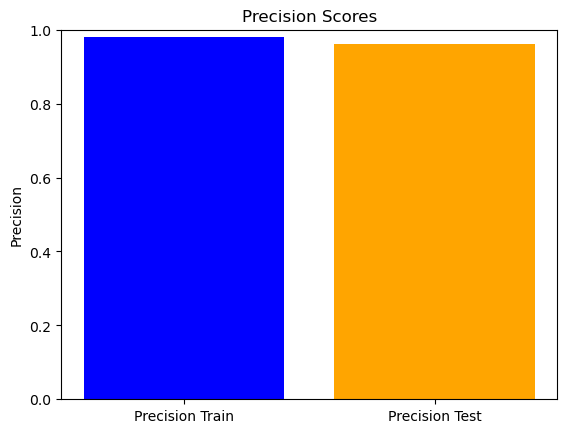

In [96]:
# Plotting Precision Scores
labels = ['Precision Train', 'Precision Test']
scores = [lr_score[0], lr_score[1]]

plt.bar(labels, scores, color=['blue', 'orange'])
plt.title('Precision Scores')
plt.ylabel('Precision')
plt.ylim(0, 1)
plt.show()